In [22]:
import pandas as pd
import csv
import numpy as np
import string
import re

In [3]:
words = pd.read_table("glove_word2Vec/glove.6B/glove.6B.50d.txt", sep=" ", index_col=0, header=None, quoting=csv.QUOTE_NONE)

In [4]:
wordsVector = words.as_matrix()
wordsList = words.index.tolist()

In [5]:
print(wordsVector.shape)
print(len(wordsList))

(400000, 50)
400000


In [6]:
type(wordsList)

list

In [7]:
baseballIndex = wordsList.index('baseball')
wordsVector[baseballIndex]

array([-1.9327  ,  1.0421  , -0.78515 ,  0.91033 ,  0.22711 , -0.62158 ,
       -1.6493  ,  0.07686 , -0.5868  ,  0.058831,  0.35628 ,  0.68916 ,
       -0.50598 ,  0.70473 ,  1.2664  , -0.40031 , -0.020687,  0.80863 ,
       -0.90566 , -0.074054, -0.87675 , -0.6291  , -0.12685 ,  0.11524 ,
       -0.55685 , -1.6826  , -0.26291 ,  0.22632 ,  0.713   , -1.0828  ,
        2.1231  ,  0.49869 ,  0.066711, -0.48226 , -0.17897 ,  0.47699 ,
        0.16384 ,  0.16537 , -0.11506 , -0.15962 , -0.94926 , -0.42833 ,
       -0.59457 ,  1.3566  , -0.27506 ,  0.19918 , -0.36008 ,  0.55667 ,
       -0.70315 ,  0.17157 ])

In [8]:
import tensorflow as tf

maxSeqLength = 10
numDimensions = 300

firstSentence = np.zeros((maxSeqLength), dtype='int32')
firstSentence[0] = wordsList.index("i")
firstSentence[1] = wordsList.index("tought")
firstSentence[2] = wordsList.index("the")
firstSentence[3] = wordsList.index("movie")
firstSentence[4] = wordsList.index("was")
firstSentence[5] = wordsList.index("incredible")
firstSentence[6] = wordsList.index("and")
firstSentence[7] = wordsList.index("inspiring")
print(firstSentence.shape)
print(firstSentence)

(10,)
[    41 305234      0   1005     15   7446      5  13767      0      0]


### Converting sentences

 Creating a utility function to convert sentences into an numpy array of words.

In [27]:
def convert_sentence(sentence):
    remove_special_chars = re.compile("[^A-Za-z0-9 ]+")
    
    sentence = sentence.lower()
    sentence = sentence.translate(None, string.punctuation)
    sentence = re.sub(remove_special_chars, "", sentence)
    sentence = sentence.split(" ")
#     if len(sentence) > maxSeqLength:
#         sentence = sentence[:maxSeqLength]
    sentenceList = []
    for word in sentence:
        try:
            sentenceList.append(wordsList.index(word))
        except ValueError:
            # TODO create a vector for unknow words
            # https://groups.google.com/forum/#!topic/globalvectors/n6BYywiENGo
            # For now just skip unkown words
            pass
        
    return np.array(sentenceList)

In [24]:
testSent = "Hello, how are you doing today?"

testSentVec = convert_sentence(testSent)

print(testSentVec)

[13075   197    32    81   914   373]


In [11]:
with tf.Session() as sess:
    print(tf.nn.embedding_lookup(wordsVector, firstSentence).eval().shape)

(10, 50)


## Load Data

Now we will load the movie review data. 
The data comes from https://www.kaggle.com/c/word2vec-nlp-tutorial/data

In [12]:
train_reviews = pd.read_table("movie_review_dataset/labeledTrainData/labeledTrainData.tsv", sep='\t')

In [13]:
train_reviews.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


## Exploratory analysis

Exploring the number of words in each review 

In [16]:
def sentence_len(sentence):
    sentence = sentence.translate(None, string.punctuation)
    sentence = sentence.split(" ")
    return len(sentence)

In [18]:
num_words = train_reviews.apply(lambda row: sentence_len(row['review']), axis=1)

In [21]:
num_words.describe()

count    25000.000000
mean       233.786240
std        173.745845
min         10.000000
25%        127.000000
50%        174.000000
75%        284.000000
max       2470.000000
dtype: float64

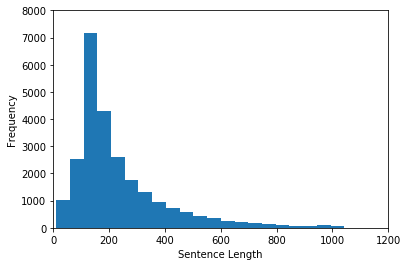

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(num_words, 50)
plt.xlabel("Sentence Length")
plt.ylabel("Frequency")
plt.axis([0, 1200, 0, 8000])
plt.show()

## Converting words to word vecs

#### TODO

We may have to have all reviews be of the same length. This is kind of inconvinient since we will lose information.
Check if anyone has a solution to this.

In [ ]:
train_reviews_ids = train_reviews.apply(lambda row: convert_sentence(row['review']), axis=1)